`Machine Learning Algorithms - Linear Regression`

Today, I revisited data science tutorials and books to refresh my skills from the previous year. I downloaded a real estate dataset from Kaggle to perform exploratory data analysis and build a Linear Regression model.


`Problem Statement`:

A real estate company in Delhi has a dataset containing the prices of properties in the region. The company wants to optimize the sale prices of the properties based on important factors such as area, bedrooms, parking, etc. The objectives are:

* Identify the variables affecting house prices such as area, number of rooms, bathrooms, etc.
* Create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.
* Determine the accuracy of the model in predicting house prices.

`Data Source`:

The dataset can be found on Kaggle. Click [HERE]('https://www.kaggle.com/datasets/venkatahemanthg/housing-price')
 to access it. 

`Work Checkpoint`:

1. Prepare the Environment
2. Explore the Data
3. Clean the Data
4. Perform Exploratory Data Analysis
5. Build the Model
6. Predict Model Accuracy




`Preparing the Environment`

The traditional first step in starting any data science or analytic project is to defind the environment that one is working under. These environments usually comes in a form of packages and they are normally said to be 'Libraries'. There are so many python libraries but the one we will work with are `pandas, numpy, seaborn, matplotlib and sklearn`.

1. Importation of relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read in data in csv format
file = 'Housing.csv'

data = pd.read_csv(file)

2. Exploring the Data

At this juncture, I will take a look at the data using the `data.head(),data.tail()` and other functions to get a glimpse of the data that I will be exploring. 

In [3]:
#Previewing the first 5 rows of the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#Previewing the last 5 rows of the dataset
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


* We can easily tell from the output above that there is a mixture of numerical and categorical data points or variables.
* Each row represents different price points or sales point and the corresponding property type descriptions such as the number of bedrooms, bathrooms, stories, mainroads etc. 
* There is also the furnishing status of the property and other locational details.

In [5]:
# Entire preview of the dataset
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
# Shape of the dataset
print('Number of Rows and Columns, respectively:') 
print(data.shape)

Number of Rows and Columns, respectively:
(545, 13)


In [7]:
# Summarised information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


* The output above indicates that there are 545 rows including the header and 13 columns.
* The next important task here normally is to check if the data types corresponds to the corresponding values attached. 

So far the Data Types are correct and matches the corresponding values.

3. Data Cleaning

Before we start with the exploratory analysis of this dataset, we must first clean the data or "scrub the dirt".

Concerning this section, we will look at finding whether there are missing values in the dataset, whether there are duplicated and use other cleaning functions to clean the data to avoid any form of bias.

`Missing Values`

In [8]:
# Checking if there are null values in all columns

data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The results shows that the dataset does not have any null values.

In [9]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

`Duplications`

In [10]:
# Checking if there are duplicated points in our data

print('Number of Duplications: ',format(data.duplicated().sum()))

Number of Duplications:  0


So it can be seen that there are no duplications with regards to this dataset


`Statistical Analysis`

At this juncture, we will perform a statistical analysis on the data. Specifically, a descriptive Statistical Analysis using the describe() function. 

In [11]:
# Descriptive statistics summary

data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
data.describe(include= 'all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


The `describe()` function which excluded the categorical columns is presented above while the output beneath takes into consideration all the data types. 

It can be seen that there were mostly two unique counts from the categorical features, with the exception of 'furnishingstatus' column. It was realized that:
* The top and frequency outputs for the 'main road' column projected that most of the houses in this data are near the main road; however, most of them are without guestrooms, basements, heatwaterheating, airconditioning, prefarea and are semi-furnished.
* It is also quite interesting that of all these features, the one with the most obvious appearance was hotwaterheating and this could one way or another give us a clue about the weather condition within the scope of our study.
* It can also be realized that 75% of the listed houses were at least 5,740,000 rupees, with the minimum house selling at 1,750,000 rupees.
* The largest area sold was 16,200 square feet. 

### 4. Exploratory Analysis

#### Exactly how many bedrooms are included in this dataset? 

<AxesSubplot:title={'center':'Number of Bedrooms'}, xlabel='bedrooms', ylabel='count'>

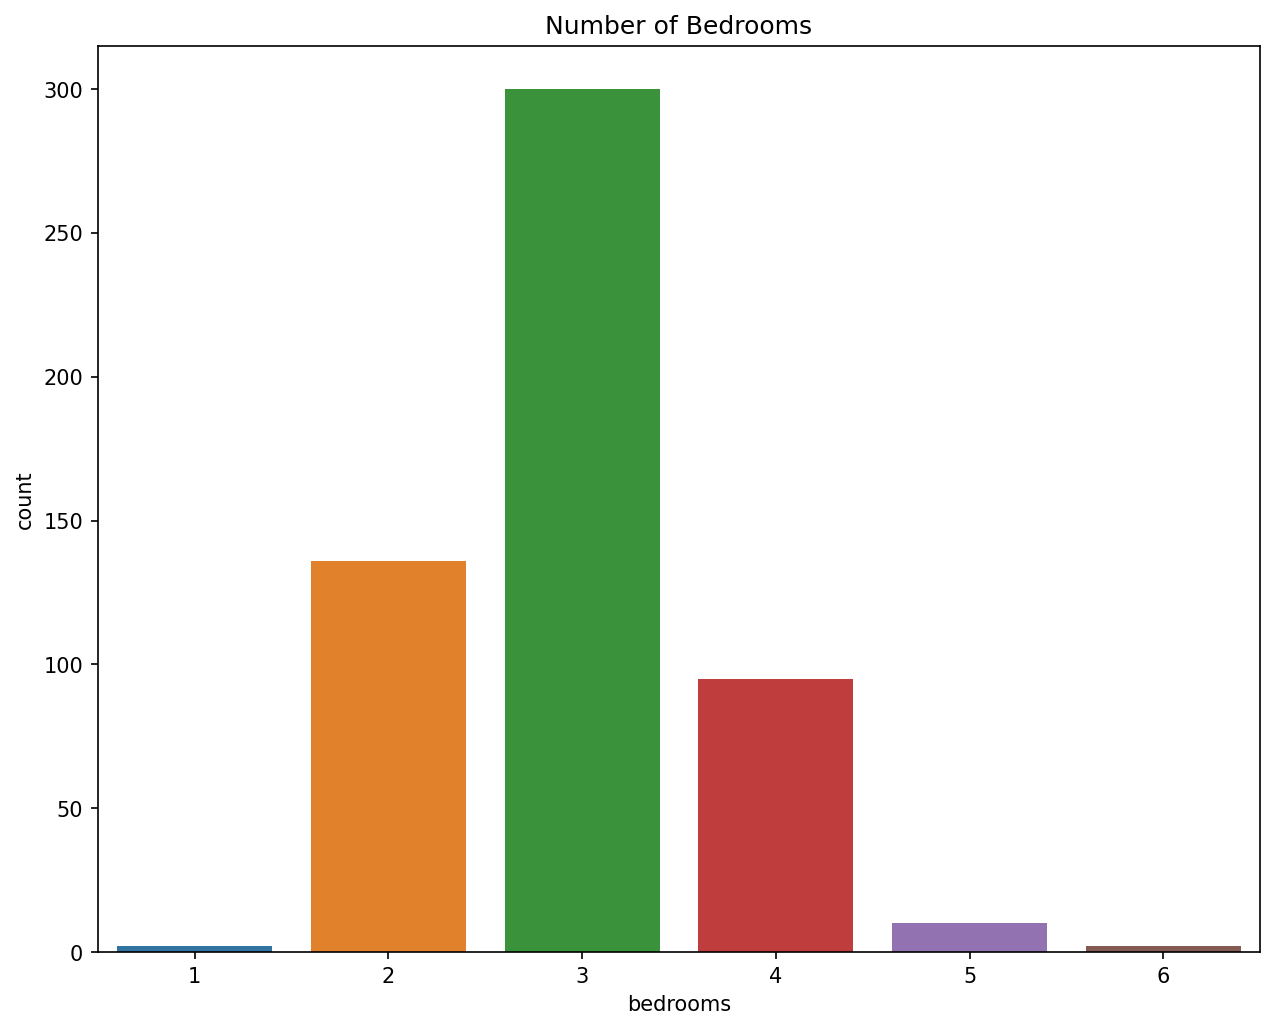

In [13]:
plt.figure(figsize=(10,8), dpi=150)
plt.title('Number of Bedrooms')
sns.countplot(data['bedrooms'])

#### Exactly how many bathrooms are included in this dataset? 

<AxesSubplot:title={'center':'Number of Bathrooms'}, xlabel='bathrooms', ylabel='count'>

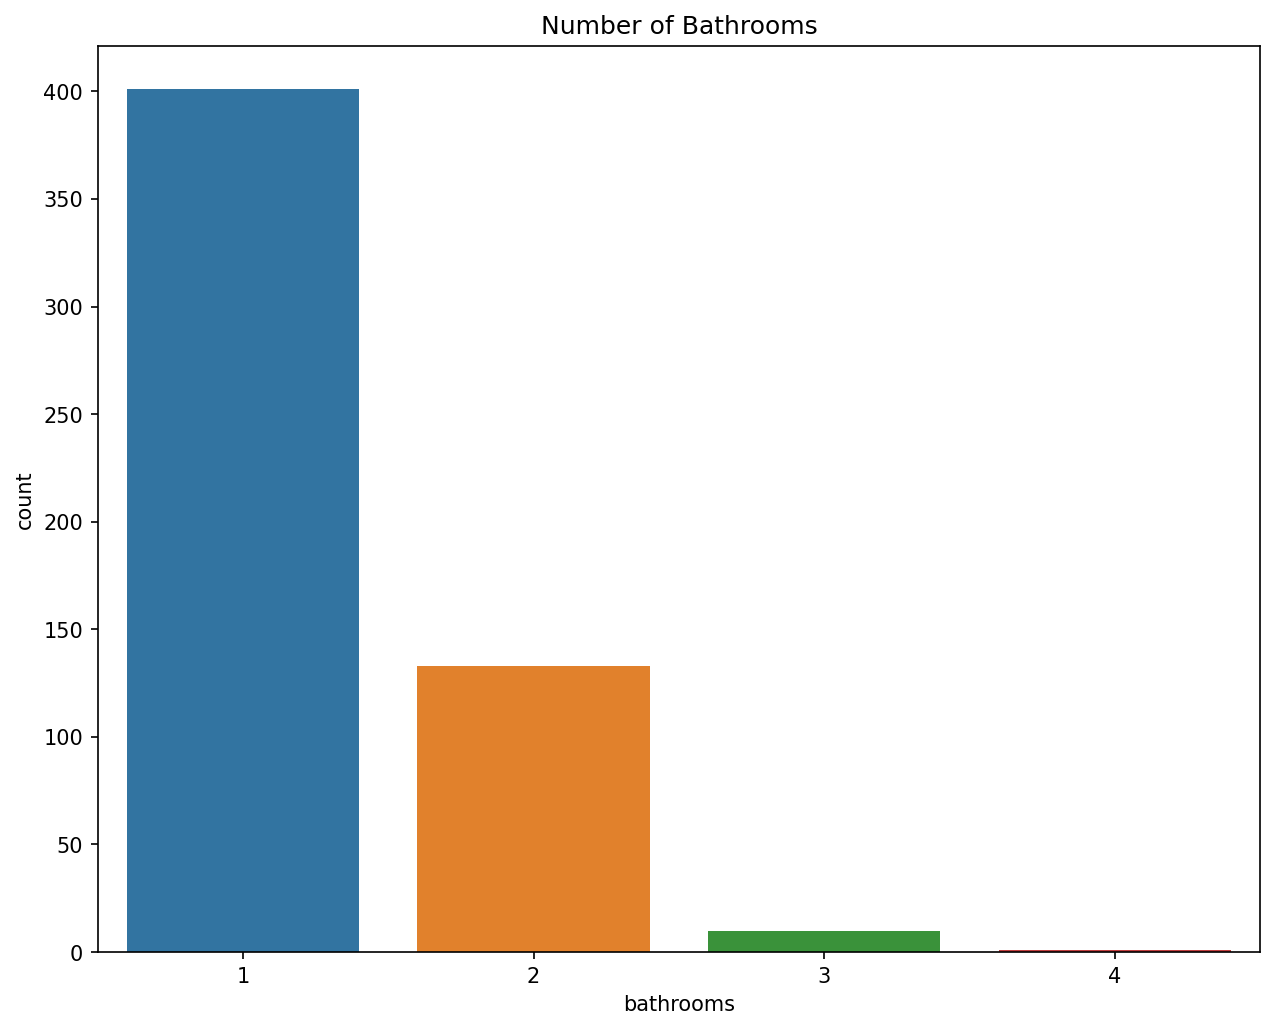

In [14]:
plt.figure(figsize=(10,8), dpi=150)
plt.title('Number of Bathrooms')
sns.countplot(data['bathrooms'])

#### Exactly how many stories are included in this dataset? 

<AxesSubplot:title={'center':'Number of Stories'}, xlabel='stories', ylabel='count'>

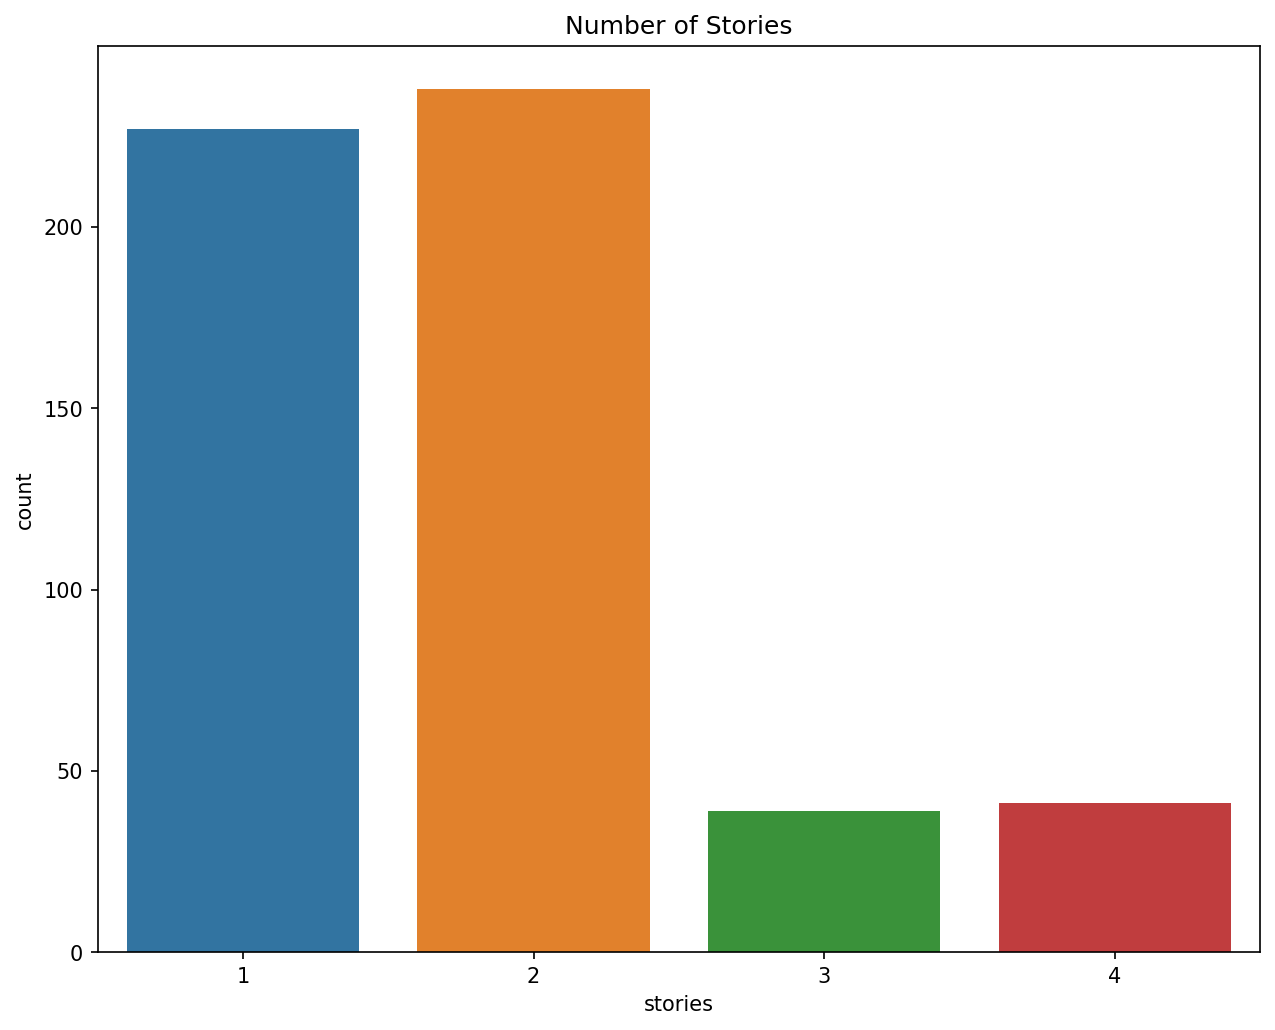

In [15]:
plt.figure(figsize=(10,8), dpi=150)
plt.title('Number of Stories')
sns.countplot(data['stories'])

#### Are there more houses near the mainroad in this dataset? 

<AxesSubplot:title={'center':'Houses near Main Road vs those which are not'}, xlabel='mainroad', ylabel='count'>

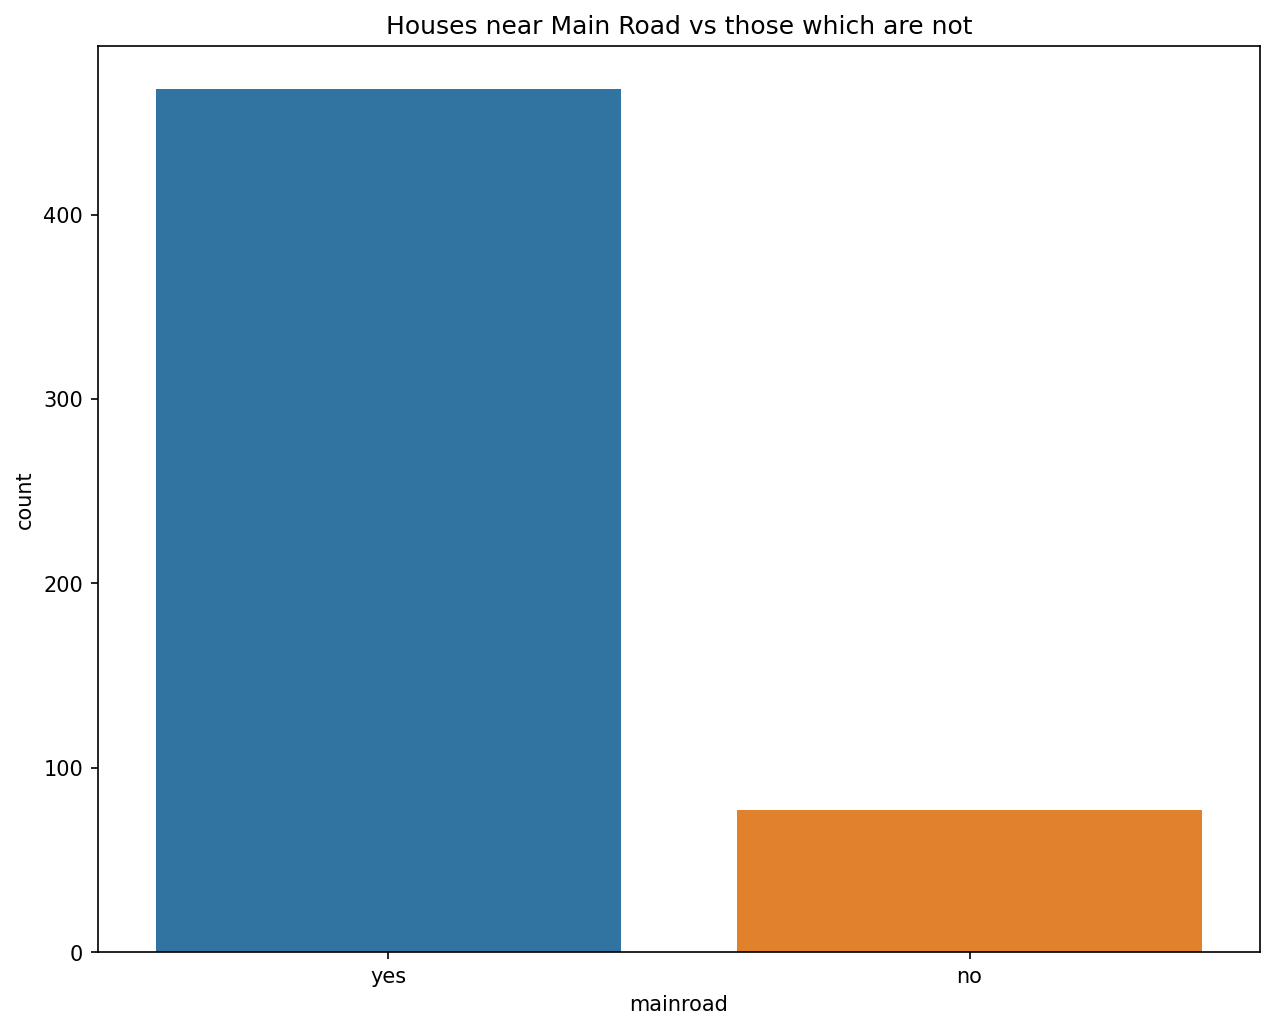

In [16]:
plt.figure(figsize=(10,8), dpi=150)
plt.title('Houses near Main Road vs those which are not')
sns.countplot(data['mainroad'])

#### Are there more guestrooms in this dataset? 

<AxesSubplot:title={'center':'Houses with Guestrooms vs Those without'}, xlabel='guestroom', ylabel='count'>

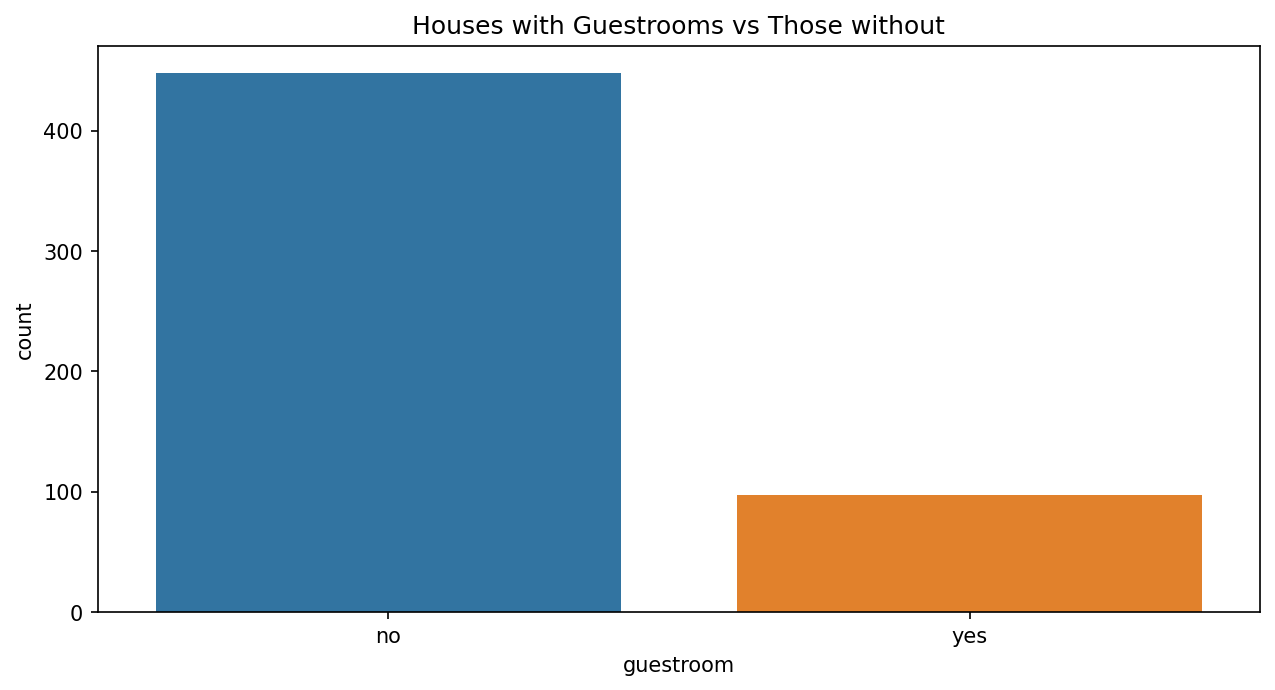

In [17]:
plt.figure(figsize=(10,5), dpi=150)
plt.title('Houses with Guestrooms vs Those without')
sns.countplot(data['guestroom'])

#### Are there more basements in this dataset? 

<AxesSubplot:title={'center':'Houses with Basement and those without'}, xlabel='basement', ylabel='count'>

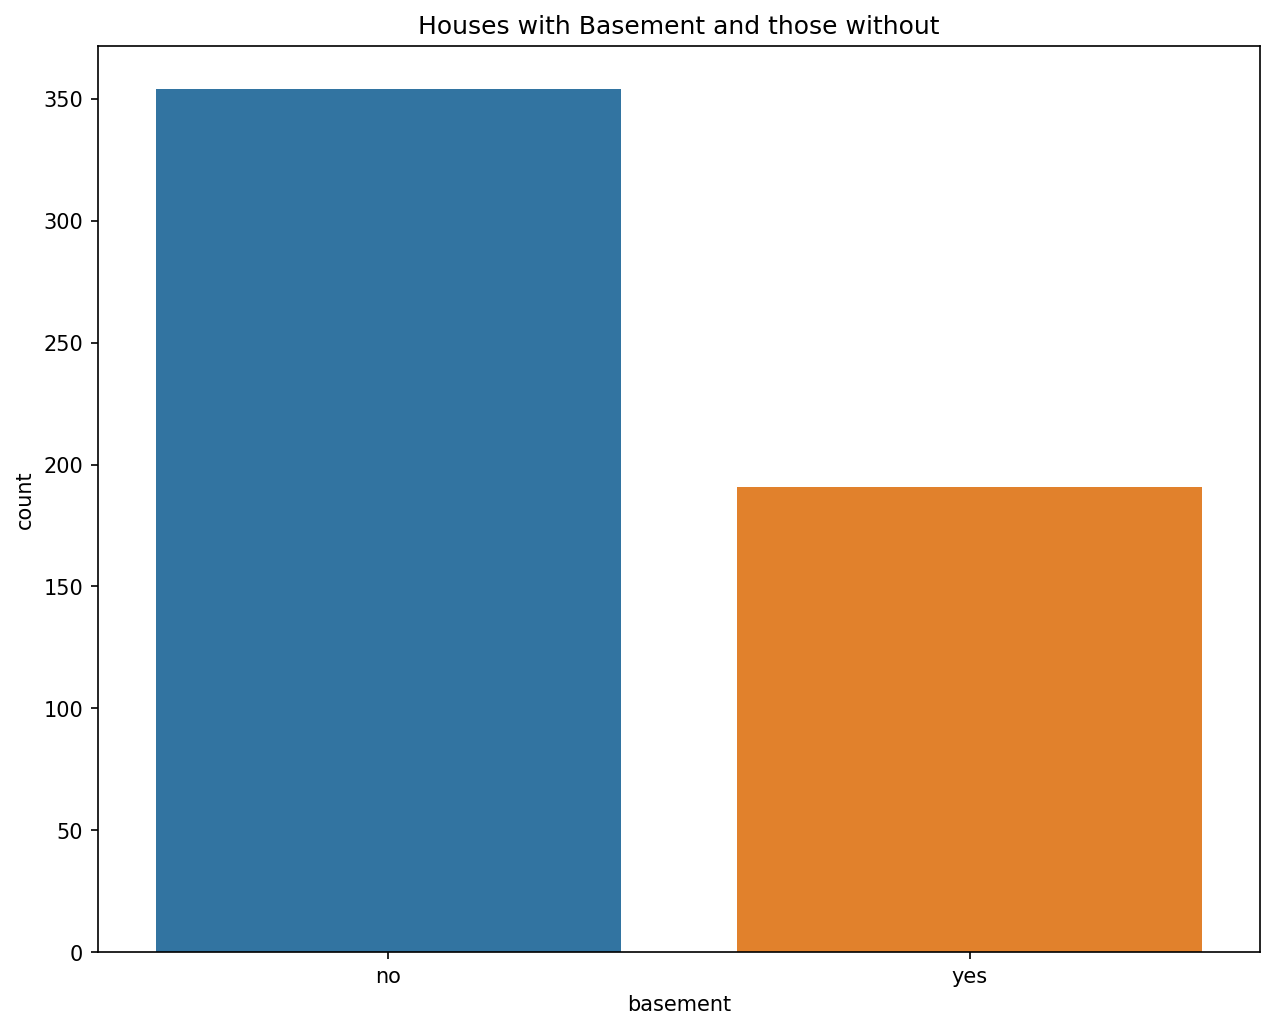

In [18]:
plt.figure(figsize=(10,8), dpi=150)
plt.title('Houses with Basement and those without')
sns.countplot(data['basement'])

#### What is the frequency of the furnishing status present in this dataset?

<AxesSubplot:title={'center':'Furnishing Status of the dataset?'}, xlabel='furnishingstatus', ylabel='count'>

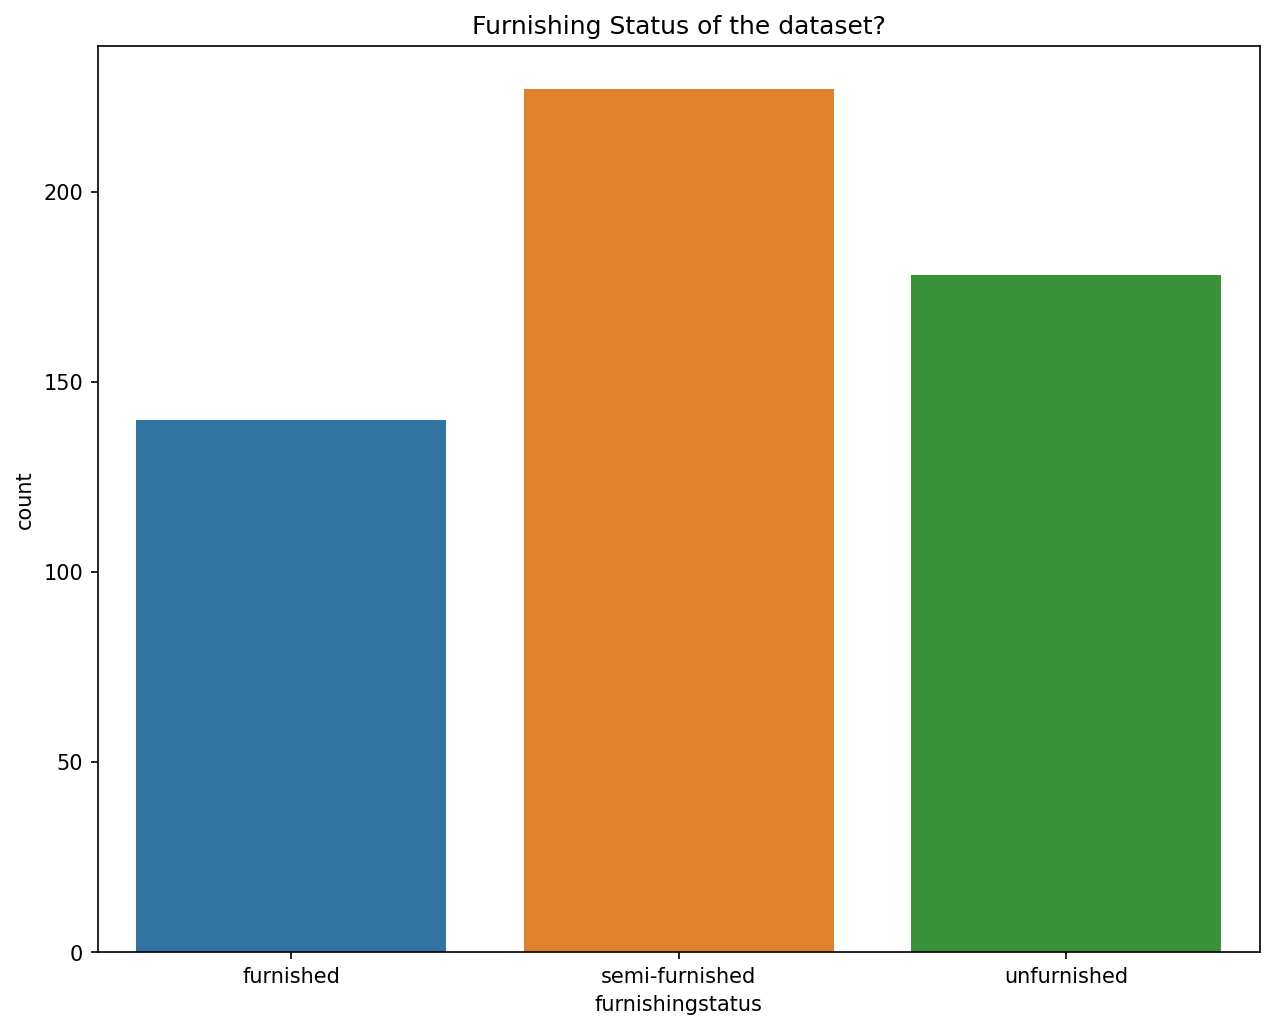

In [19]:
plt.figure(figsize=(10,8), dpi=150)
plt.title('Furnishing Status of the dataset?')
sns.countplot(data['furnishingstatus'])

`Correlation`




At this section, we will perform a correlation analysis to observe whether there are strong correlations or relationships between the variables in this dataset.

In [20]:
# Correlation

data.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


`Visual representation`

<AxesSubplot:title={'center':'Correlation Matrix'}>

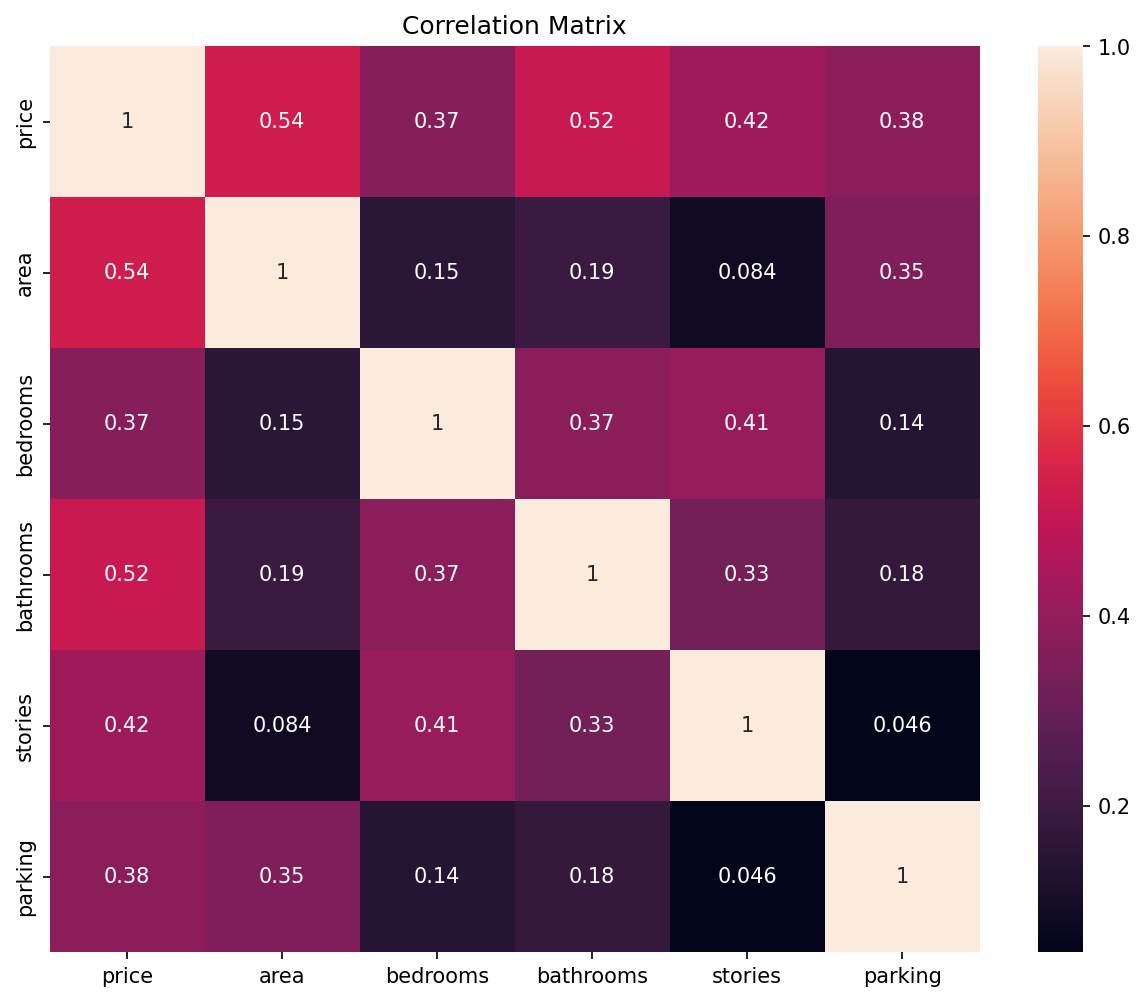

In [21]:
plt.figure(figsize=(10,8), dpi=150)
plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot=True)

The correlation analysis was done to check the presence of multicollinearity in the data.

* Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.
* It was realised that the supposed target feature(Price), had a fair positive relationship with the other variables.

<AxesSubplot:title={'center':'Distribution of House Prices in Delhi'}, xlabel='price', ylabel='Count'>

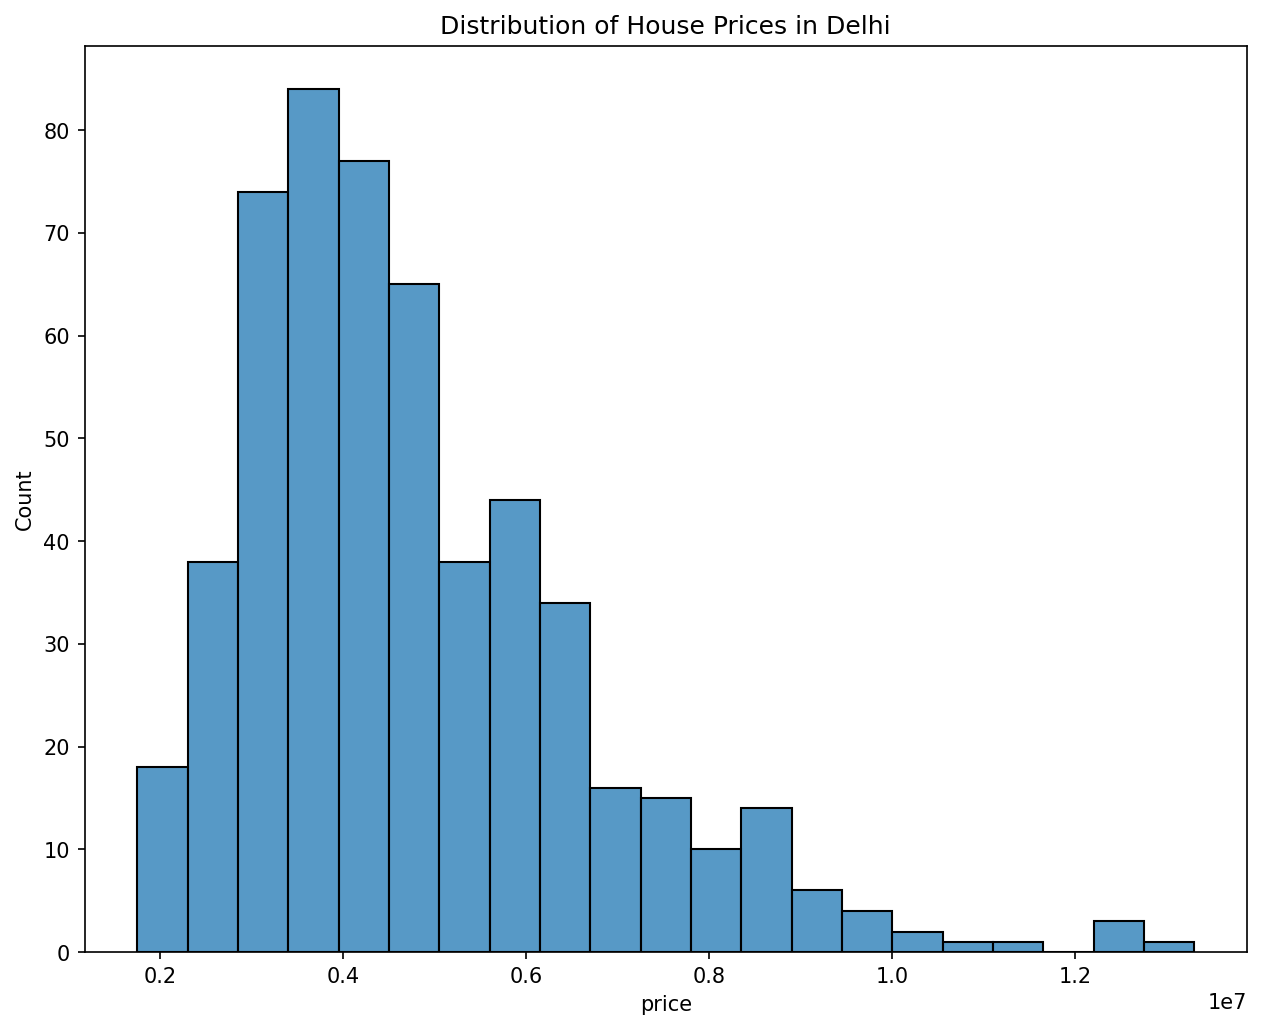

In [22]:
plt.figure(figsize=(10,8), dpi=150)
plt.title('Distribution of House Prices in Delhi')
sns.histplot(data['price'])

The above shows the distribution of the pricing list of the data. It can be seen that the dataset is skewed left.

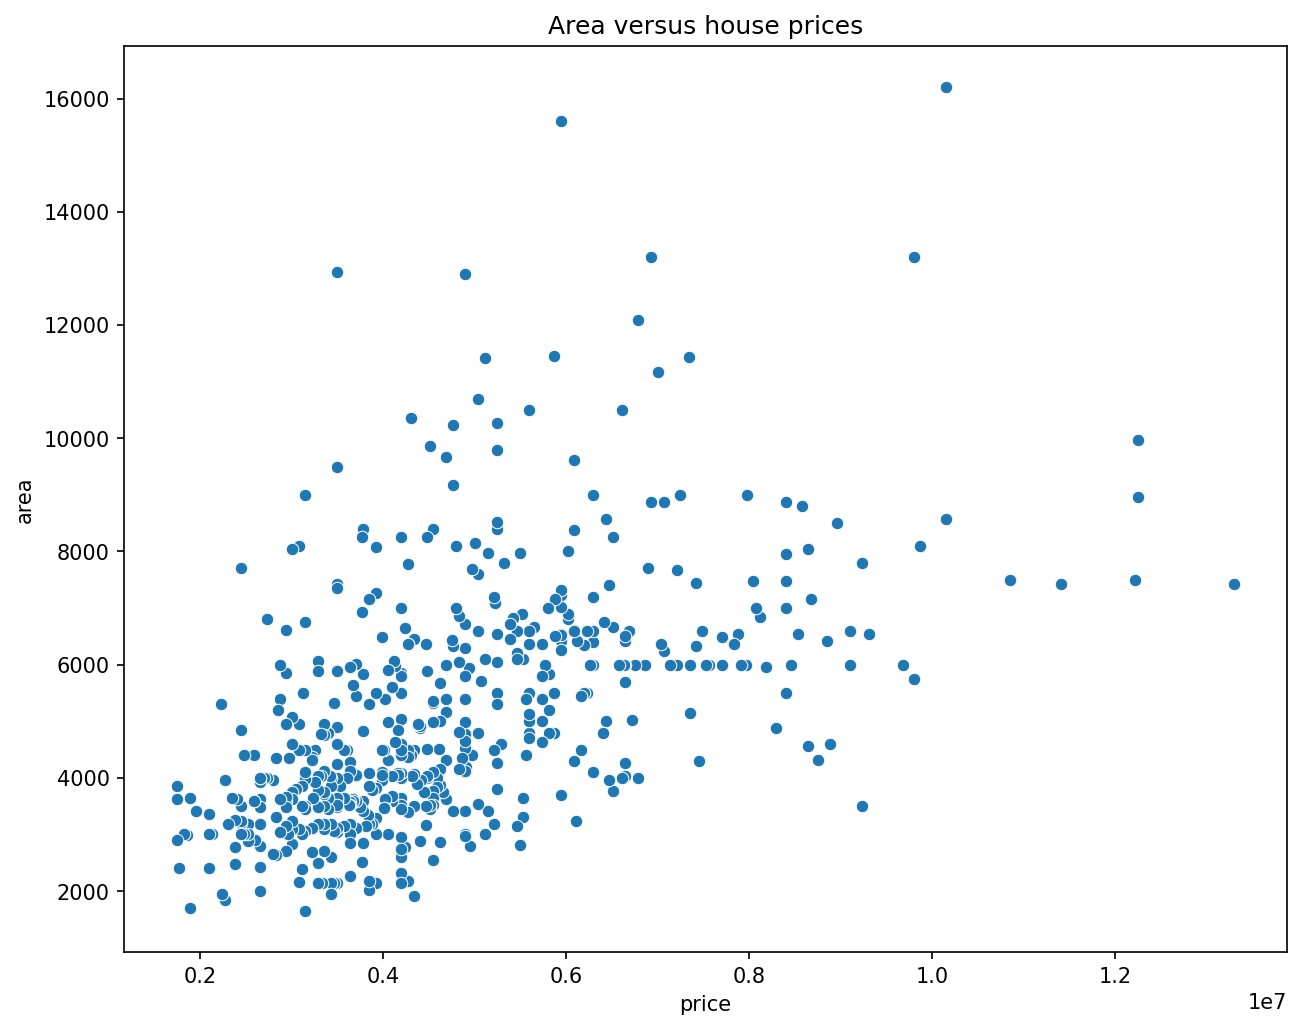

In [23]:
plt.figure(figsize=(10,8),dpi=150)
plt.title('Area versus house prices')
sns.scatterplot(data=data, x='price', y='area');

In [24]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [25]:
data.select_dtypes(include='number')

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


For the next section of this analysis, I will use just the numerical columns of the dataset to build up a model and test its accuracy.

In [26]:
# We will first split the data into features and labels

features = ['area', 'bedrooms', 'bathrooms','stories','parking']


In [27]:
X = data[features]
Y = data.price

In [28]:
# Preview of the X 
X.head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [29]:
# Preview of the Y
Y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

`Building a model`

In [30]:
# importing a machine learning library ----> sklearn
# However, we will first split the data into train dataset and test dataset.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=5, test_size=0.1)


In [31]:
X.shape, X_train.shape, X_test.shape

((545, 5), (490, 5), (55, 5))

In [32]:
Y.shape, Y_train.shape, Y_test.shape

((545,), (490,), (55,))

In [33]:
# Loading model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [34]:
# Training model on training dataset
lr.fit(X_train,Y_train)

LinearRegression()

In [35]:
# Predicting the testing data so that we can later evaluate the model
predict_lr = lr.predict(X_test)

In [36]:
mse_lr = sklearn.metrics.mean_squared_error(Y_test, predict_lr,squared=False)
print('Error for Linear Regression = {}'.format(mse_lr))

<IPython.core.display.Javascript object>

Error for Linear Regression = 1101396.1162641211


In [37]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(Y_test,predict_lr)
MSE = np.sqrt(MSE)
print('Mean Squared Error:', MSE)

Mean Squared Error: 1101396.1162641211


In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,predict_lr)

813125.9980319255

In [39]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_test,predict_lr) 

0.5731031772718533

In [40]:
data['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [41]:
4.766729e+06


4766729.0

In [42]:
(813125.9980319255/4766729)*100

17.058364300381363

In [43]:

lr.score(X_test, Y_test)

0.5487382102364837

Text(0.5, 1.0, 'Actual prices vs Predicted prices')

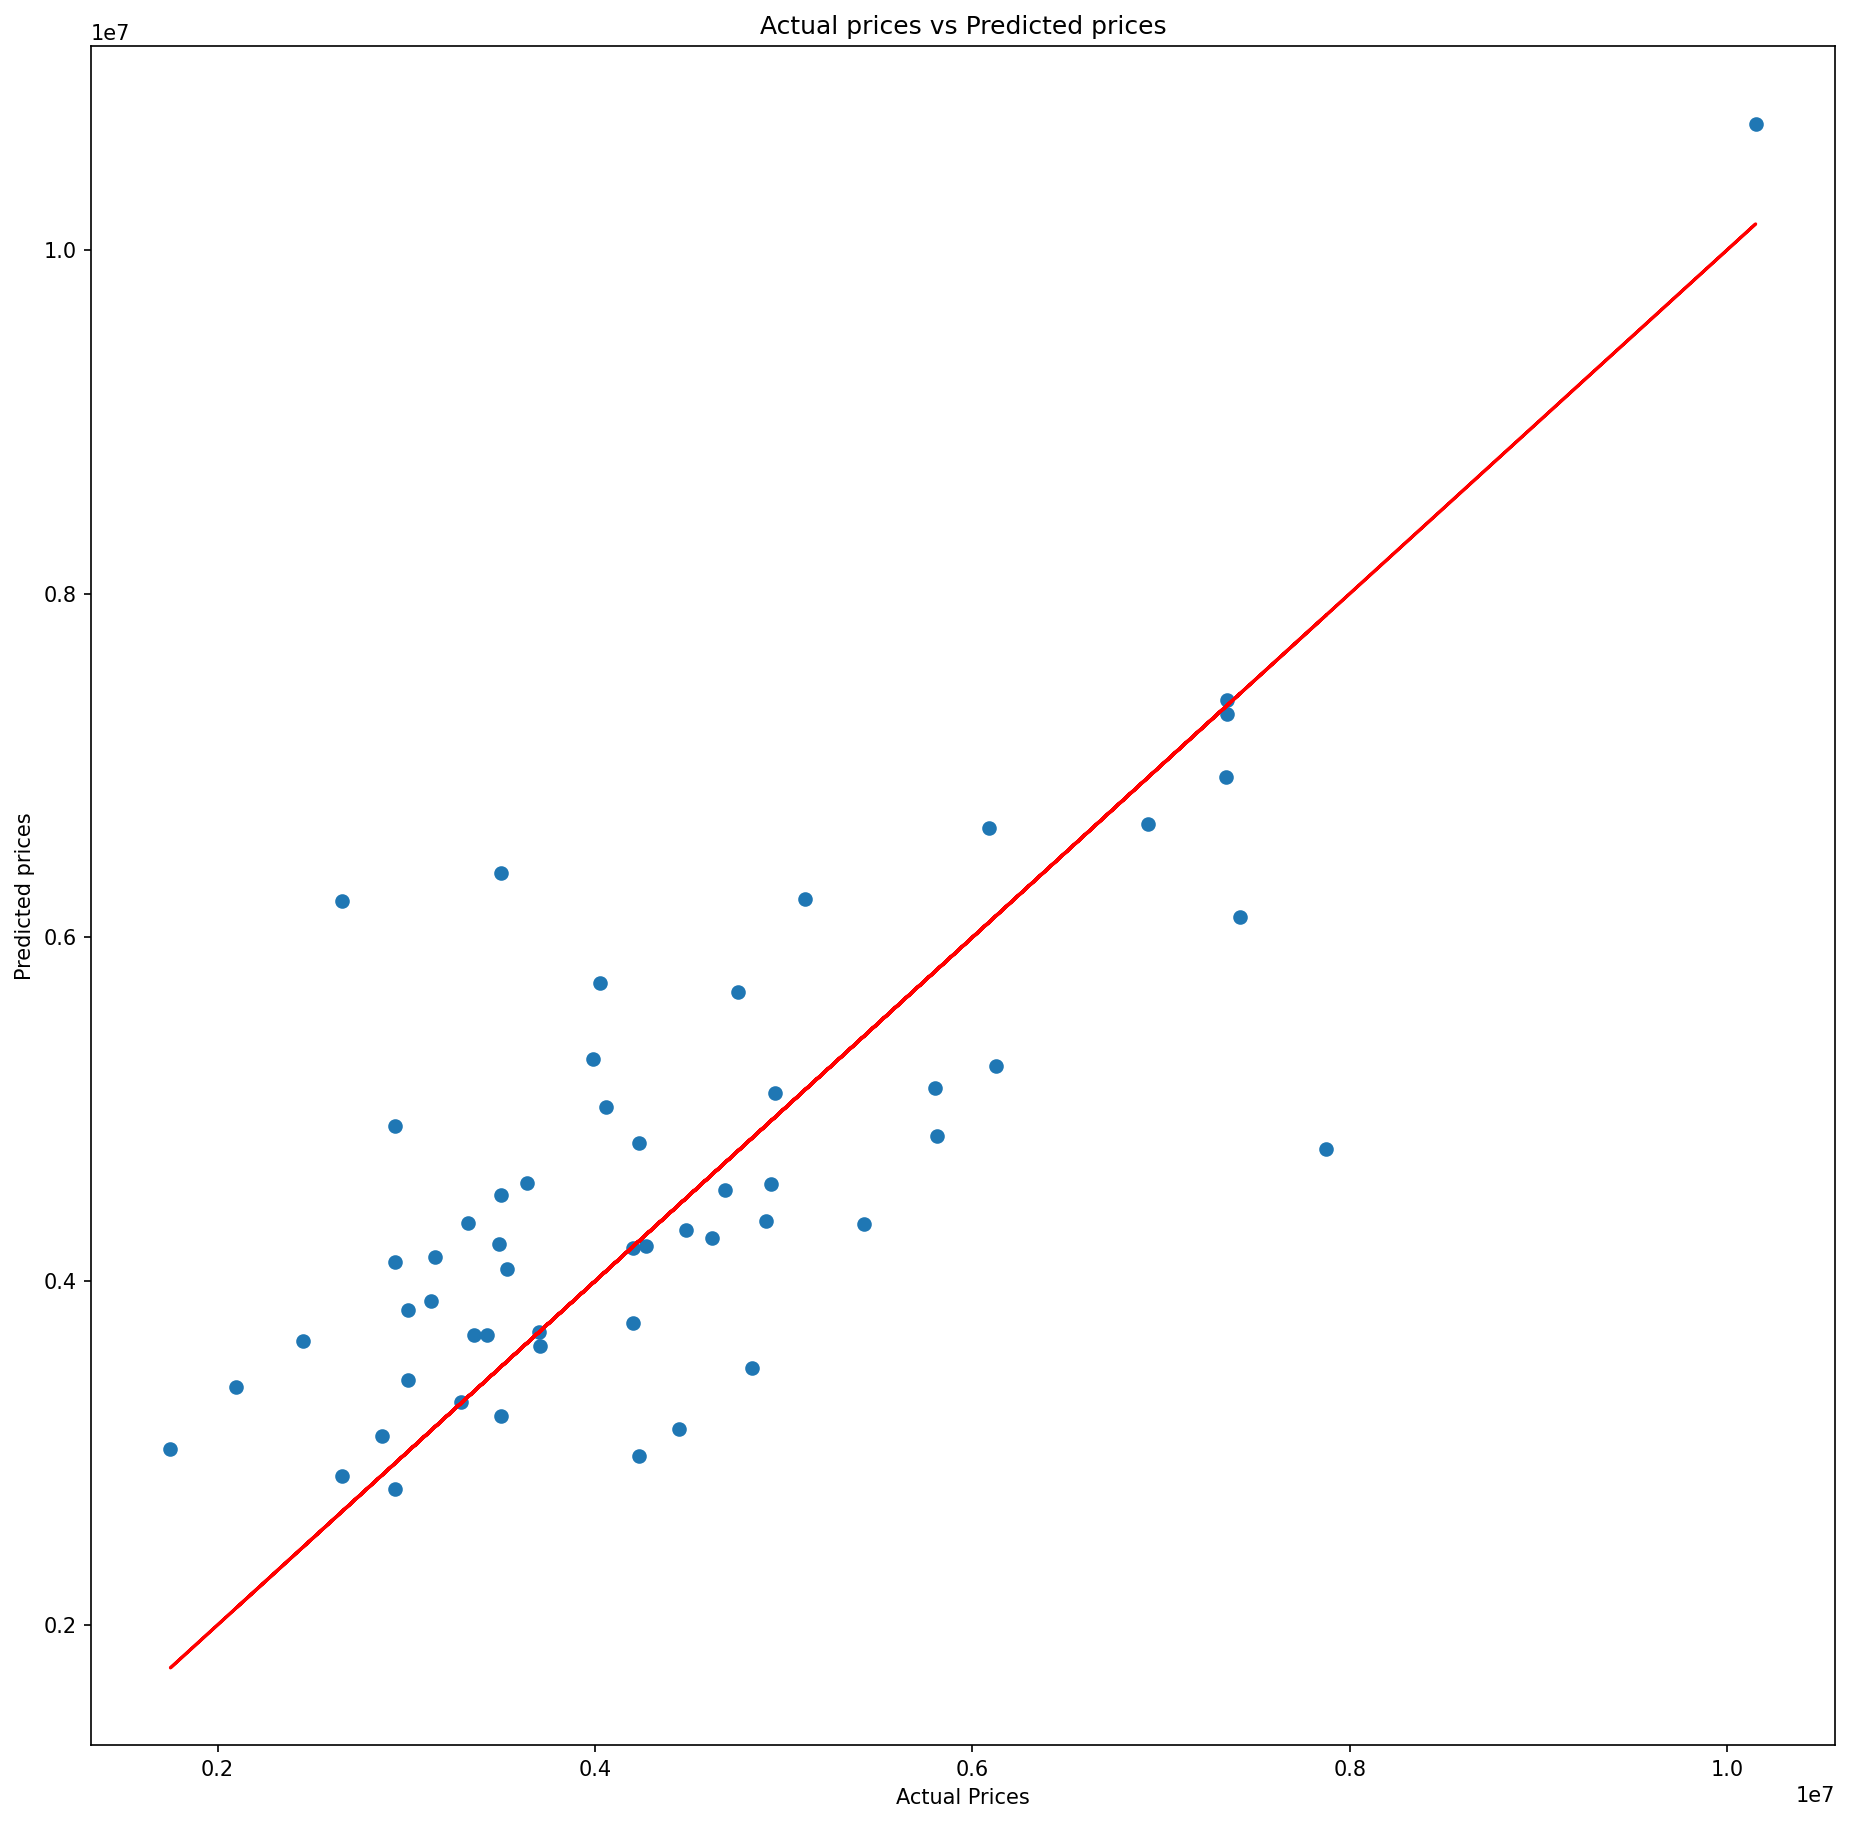

In [44]:
plt.figure(figsize=(15,15),dpi=150)
plt.scatter(Y_test,predict_lr)
plt.plot(Y_test, Y_test, color='r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")